# 作業目標:
    了解 Padding 的作法
    
    了解 Pooling 的作法

# 作業重點:
    (1) 調整Padding 的設定, 看 Pad 後的結果
    
    (2) 調整Pooling 的設定, 看 Poolin 後的結果

## Padding

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# 繪圖結果直接顯示在Jupyter cell 之內
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)  # 設定繪圖板的大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload。可以讓我們不退出IPython就動態修改代碼，在執行代碼前IPython會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [2]:
# GRADED FUNCTION
def zero_pad(X, pad):
    """
    對image X 做 zero-padding.
    參數定義如下:
    X -- python numpy array, 呈現維度 (m, n_H, n_W, n_C), 代表一批 m 個圖像
         n_H: 圖高, n_W: 圖寬, n_C: color channels 數
    pad -- 整數, 加幾圈的 zero padding.
    
    Returns:
        X_pad -- image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C) 做完 zero-padding 的結果
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
    # np.pad: input X, (四個維度的頭尾各要加幾行), 加甚麼東西(這裡選constant), constant頭尾的值各是多少
    
    return X_pad

x.shape =  (2, 5, 5, 3)
x_pad.shape =  (2, 7, 7, 3)
x[1, 1] =  [[ 1.49588477  0.67545381  0.59921324]
 [-1.47023709  0.60640394  2.29371761]
 [-0.83001099 -1.01951985 -0.21465384]
 [ 1.02124813  0.52475049 -0.47712421]
 [-0.03599018  1.03703898  0.67261975]]
x_pad[1, 1] =  [[ 0.          0.          0.        ]
 [-0.07667936  0.57296273  0.45794708]
 [-0.01781755 -0.6001388   0.14676526]
 [ 0.57180488 -0.03681766  0.11236849]
 [-0.15050433  0.91549927 -0.43820027]
 [ 0.18553562  0.39442803  0.72552256]
 [ 0.          0.          0.        ]]


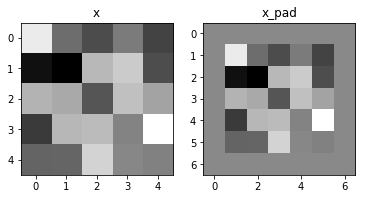

In [8]:
x = np.random.randn(2, 5, 5, 3)
x_pad = zero_pad(x, 1)

print('x.shape = ', x.shape)
print('x_pad.shape = ', x_pad.shape)
print('x[1, 1] = ', x[1, 1])
print('x_pad[1, 1] = ', x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

## Pooling

In [11]:
# GRADED FUNCTION: pool_forword
def pool_forward(A_prev, hparameters, mode = 'max'):
    """
    設計一個前行網路的池化層
    參數設定如下:
    
    A_prev -- 輸入的numpy陣列, 維度(m, n_H_prev, n_W_prev, n_C_prev)
    hparameters 超參數 -- "f" and "stride" 所形成的python字典
    mode -- 池畫的模式: "max" or "average"
    
    Returns:
        A -- 輸出的池化層, 維度為(m, n_H, n_W, n_C)的numpy陣列
        cache -- 可以應用在back pass pooling layer資料, 包含input and hparameters
    """
    
    # 檢索尺寸 from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # 檢索超參數 from "hparameters"
    f = hparameters['f']
    stride = hparameters['stride']
    
    # 定義輸出的dimensions
    n_H = int((n_H_prev - f) / stride) +1
    n_W = int((n_W_prev - f) / stride) +1
    n_C = n_C_prev
    
    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C)) #記得zeros裡面用tuple
    
    ### 程式起始位置 ###
    for i in range(m): # 訓練樣本的for迴圈
        for h in range(n_H): # 輸出樣本的for迴圈, 針對vertical axis
            for w in range(n_W): # 輸出樣本的for迴圈, 針對horizontal axis
                for c in range(n_C): # 輸出樣本的for迴圈, 針對channels
                    
                    # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride + f
                    horiz_start = w *stride
                    horiz_end = w * stride + f
                    
                    # 定義第i個訓練示例
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    # 計算輸入data的池化結果, 使用if statement去做分類
                    if mode == 'max':
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == 'average':
                        A[i, h, w, c] = np.mean(a_prev_slice)
                        
                    ### 程式結束 ###
    # 儲存輸入的特徵圖跟所設定的超參數, 可以用在pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [13]:
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {'f': 3, 'stride': 2}

A, cache = pool_forward(A_prev, hparameters)
print('mode = max')
print('A = ', A)
print()

A, cache = pool_forward(A_prev, hparameters, mode = 'average')
print('mode = average')
print('A = ', A)

mode = max
A =  [[[[2.23027415 1.31289541 1.29099337]
   [2.23027415 1.07905705 2.91730876]]

  [[1.0986885  1.50452187 1.75875935]
   [1.67072922 1.50452187 1.87230326]]]


 [[[1.46226798 1.82481879 1.21771626]
   [1.46226798 1.08109299 1.72439172]]

  [[1.46226798 1.39408104 2.82729979]
   [1.46226798 0.858286   2.82729979]]]]

mode = average
A =  [[[[ 0.34339489  0.2763973   0.33571988]
   [ 0.54644446  0.00356395  0.41264563]]

  [[ 0.30103733  0.15524024  0.30224447]
   [ 0.03214123 -0.27415723  0.19628851]]]


 [[[ 0.06701647  0.5453872  -0.16135386]
   [-0.20659337  0.38481619  0.21597594]]

  [[ 0.19612566  0.17418281  0.3593591 ]
   [ 0.18323032  0.07708964  0.47590016]]]]
